### Load the dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/resume_dataset.csv")

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [36]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

### Make sure the Section Title "Company Details" has space before

In [ ]:
import re

def clean_merged_titles(text):
    """
    Fixes merged section titles in resume text by ensuring spaces before 'Company Details', 'Education Details', etc.
    """
    # Fix cases where "monthsCompany" appears without a space
    text = re.sub(r"(\w)(Company Details|Education Details|Skill Details)", r"\1 \2", text)

    return text

# Apply to all resumes
df["cleaned_resume"] = df["Resume"].apply(clean_merged_titles)

print(df[["Resume", "cleaned_resume"]].head(10))

                                              Resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Education Details \r\n MCA   YMCAUST,  Faridab...   
5  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   
6  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
7  Education Details \r\n B.Tech   Rayat and Bahr...   
8  Personal Skills â¢ Ability to quickly grasp t...   
9  Expertise â Data and Quantitative Analysis â...   

                                      cleaned_resume  
0  Skills * Programming Languages: Python (pandas...  
1  Education Details \r\nMay 2013 to May 2017 B.E...  
2  Areas of Interest Deep Learning, Control Syste...  
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...  
4  Education Details \r\n MCA   YMCAUST,  Faridab...  
5  SKILLS C Basics, IOT, Python, MATLAB, Data Sci... 

### Extract all section titles 

In [ ]:
import re

def extract_titles(text):
    """
    Extracts section titles after fixing merged words.
    Titles typically follow a pattern like 'Education Details', 'Company Details'.
    """
    pattern = r"(?i)\b([A-Za-z]+ (Details|Description|Interests|Summary|Profile|Experience))\b"
    
    matches = re.findall(pattern, text)

    # Extract only the full matched phrase (e.g., "Company Details", "Education Details")
    return [match[0] for match in matches]

# Apply function to cleaned resumes
df["extracted_titles"] = df["cleaned_resume"].apply(extract_titles)

print(df[["Resume", "cleaned_resume", "extracted_titles"]].head(10))

                                              Resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Education Details \r\n MCA   YMCAUST,  Faridab...   
5  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   
6  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
7  Education Details \r\n B.Tech   Rayat and Bahr...   
8  Personal Skills â¢ Ability to quickly grasp t...   
9  Expertise â Data and Quantitative Analysis â...   

                                      cleaned_resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Education Details \r\n MCA   YMCAUST,  Faridab...   
5  SKILLS C Basics, IOT, Python, MATLAB, Data S

### Function to extract sections

In [39]:
def extract_section(text, title):
    """
    Extracts content of a specific resume section after cleaning merged section titles.
    """
    pattern = rf"{title}\s*[:•-]?\s*(.*?)(?=\b[A-Za-z]+ (Details|Description|Interests|Summary|Profile|Experience)|\Z)"
    match = re.search(pattern, text, re.IGNORECASE | re.DOTALL)
    
    return match.group(1).strip() if match else ""

### Extract 'Skill Details' section content 

In [40]:
import re

def extract_skill_details(text):
    """
    Extracts content under the 'Skill Details' section, stopping at 'Company Details'.
    """
    pattern = r"Skill Details\s*[:•-]?\s*(.*?)(?=\bCompany Details\b|\Z)"
    match = re.search(pattern, text, re.IGNORECASE | re.DOTALL)

    return match.group(1).strip() if match else ""

# Apply function to extract skills
df["skill_details_content"] = df["cleaned_resume"].apply(extract_skill_details)

# Show some results
print(df[["cleaned_resume", "skill_details_content"]].head(10))

                                      cleaned_resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Education Details \r\n MCA   YMCAUST,  Faridab...   
5  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   
6  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
7  Education Details \r\n B.Tech   Rayat and Bahr...   
8  Personal Skills â¢ Ability to quickly grasp t...   
9  Expertise â Data and Quantitative Analysis â...   

                               skill_details_content  
0  JAVASCRIPT- Exprience - 24 months\r\njQuery- E...  
1  Python- Exprience - Less than 1 year months\r\...  
2  Data Analysis- Exprience - Less than 1 year mo...  
3  LINEAR PROGRAMMING- Exprience - 6 months\r\nRE...  
4  Data Structure- Exprience - Less than 1 year m...  
5  MS OFFICE- Exprience - Less than 1 year months... 

### Standradize and format skill section

In [41]:
import re

# Function to clean text: remove extra spaces and newlines
def clean_text(text):
    if isinstance(text, str):
        text = text.replace("\r\n", " ")  # Replace newlines with space
        text = re.sub(r"\s{2,}", " ", text).strip()  # Remove extra spaces
    return text

# Apply text cleaning before further processing
df["cleaned_skill_details"] = df["skill_details_content"].apply(clean_text)

In [42]:
# Updated regex pattern to extract skills and experience
# skill_experience_pattern = r"([\w\s\(\)\-\/]+?)\s*-\s*expe?rience\s*-\s*(\d+\s*(?:months)?(?:\s*years?)?|less than \d+ year(?: months)?)"
skill_experience_pattern = r"([\w\s\(\)\-\/\+\#]+?)\s*-\s*expe?rience\s*-\s*(\d+\s*(?:months)?(?:\s*years?)?|less than \d+ year(?: months)?)"

# Function to clean extracted experience durations
def clean_experience(exp):
    exp = exp.strip().lower()
    if "less than 1 year months" in exp:
        exp = exp.replace("less than 1 year months", "less than 1 year")  # Fix incorrect format
    return exp

# Function to standardize skills
def standardize_skill(skill):
    return skill.strip().lower()  # Convert to lowercase and remove extra spaces

# Function to extract and standardize skills
def extract_skills_experience_dict(text):
    if isinstance(text, str):
        matches = re.findall(skill_experience_pattern, text, re.IGNORECASE)
        skill_dict = {standardize_skill(match[0]): clean_experience(match[1]) for match in matches}
        return skill_dict
    return {}

# Apply extraction function
df["extracted_skills"] = df["cleaned_skill_details"].apply(extract_skills_experience_dict)

In [43]:
# Print output csv
df.to_csv("cleaned_dataset.csv")

### Extract Years of Experience for each skill

In [44]:
# Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

In [45]:
import pandas as pd
import re
import ast

# Function to convert experience text into numerical months
def convert_experience(exp):
    if not exp:
        return None  # Return None if missing
    
    exp = str(exp).lower().strip()
    
    # Handle "less than X year" cases
    if "less than 1 year" in exp:
        return 6  # Assume "less than 1 year" means ~6 months
    
    # Extract numerical values
    match = re.search(r"(\d+)\s*(months|years)?", exp)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        
        # Convert years to months
        if unit and "year" in unit:
            return num * 12
        return num  # Already in months
    
    return None  # Return None if experience format is unknown

# Function to process experience dictionary at resume level
def process_resume_experience(skills_dict):
    if not isinstance(skills_dict, dict):
        return None, None, None, None  # Return None values for empty input

    skill_experience_list = []
    skill_count = len(skills_dict)  # Count total skills mentioned

    for skill, exp in skills_dict.items():
        months_experience = convert_experience(exp)  # Convert to numerical months
        if months_experience is not None:
            skill_experience_list.append(months_experience)

    total_experience = sum(skill_experience_list) if skill_experience_list else None
    avg_experience_per_skill = round(sum(skill_experience_list) / len(skill_experience_list), 2) if skill_experience_list else None
    max_experience = round(max(skill_experience_list), 2) if skill_experience_list else None  # Max experience in any single skill

    return total_experience, avg_experience_per_skill, max_experience, skill_count

# Debug: Check if extracted_skills column is correctly formatted
def safe_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else {}
    except (SyntaxError, ValueError):
        print(f"Error parsing: {val}")
        return {}

df["extracted_skills"] = df["extracted_skills"].apply(safe_eval)

# Debug: Print sample extracted_skills
debug_sample = df["extracted_skills"].head(5)
print("Sample extracted_skills data:", debug_sample)

# Apply function to each row (resume level)
df[["Total_Experience_Months", "Avg_Experience_Per_Skill", "Max_Skill_Experience", "Total_Skills_Mentioned"]] = df["extracted_skills"].apply(
    lambda x: pd.Series(process_resume_experience(x))
)

# Debug: Check computed values
debug_values = df[["Total_Experience_Months", "Avg_Experience_Per_Skill", "Max_Skill_Experience", "Total_Skills_Mentioned"]].head(5)
print("Debug computed values:", debug_values)

Sample extracted_skills data: 0    {'javascript': '24 months', 'jquery': '24 mont...
1    {'python': 'less than 1 year', 'statsmodels': ...
2    {'data analysis': 'less than 1 year', 'excel':...
3    {'linear programming': '6 months', 'retail': '...
4    {'data structure': 'less than 1 year', 'c': 'l...
Name: extracted_skills, dtype: object
Debug computed values:    Total_Experience_Months  Avg_Experience_Per_Skill  Max_Skill_Experience  \
0                     72.0                     24.00                  24.0   
1                     48.0                      6.86                  12.0   
2                     48.0                      6.00                   6.0   
3                     54.0                      6.00                   6.0   
4                     36.0                      6.00                   6.0   

   Total_Skills_Mentioned  
0                     3.0  
1                     7.0  
2                     8.0  
3                     9.0  
4                     6.0

In [46]:
# Save the processed data
df.to_csv("processed_dataset.csv", index=False)

In [47]:
df.head()

,Unnamed: 0,Category,Resume,cleaned_resume,extracted_titles,skill_details_content,cleaned_skill_details,extracted_skills,Total_Experience_Months,Avg_Experience_Per_Skill,Max_Skill_Experience,Total_Skills_Mentioned
0,0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...,"['Education Details', 'Skill Details', 'Compan...",JAVASCRIPT- Exprience - 24 months\r\njQuery- E...,JAVASCRIPT- Exprience - 24 months jQuery- Expr...,"{'javascript': '24 months', 'jquery': '24 mont...",72.0,24.00,24.0,3.0
1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details \r\nMay 2013 to May 2017 B.E...,"['Education Details', 'Skill Details', 'Compan...",Python- Exprience - Less than 1 year months\r\...,Python- Exprience - Less than 1 year months St...,"{'python': 'less than 1 year', 'statsmodels': ...",48.0,6.86,12.0,7.0
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste...","['Education Details', 'Skill Details', 'Compan...",Data Analysis- Exprience - Less than 1 year mo...,Data Analysis- Exprience - Less than 1 year mo...,"{'data analysis': 'less than 1 year', 'excel':...",48.0,6.00,6.0,8.0
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"['Education Details', 'Skill Details', 'Compan...",LINEAR PROGRAMMING- Exprience - 6 months\r\nRE...,LINEAR PROGRAMMING- Exprience - 6 months RETAI...,"{'linear programming': '6 months', 'retail': '...",54.0,6.00,6.0,9.0
4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details \r\n MCA YMCAUST, Faridab...","['Education Details', 'Skill Details', 'Compan...",Data Structure- Exprience - Less than 1 year m...,Data Structure- Exprience - Less than 1 year m...,"{'data structure': 'less than 1 year', 'c': 'l...",36.0,6.00,6.0,6.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                962 non-null    int64  
 1   Category                  962 non-null    object 
 2   Resume                    962 non-null    object 
 3   cleaned_resume            962 non-null    object 
 4   extracted_titles          962 non-null    object 
 5   skill_details_content     746 non-null    object 
 6   cleaned_skill_details     746 non-null    object 
 7   extracted_skills          962 non-null    object 
 8   Total_Experience_Months   726 non-null    float64
 9   Avg_Experience_Per_Skill  726 non-null    float64
 10  Max_Skill_Experience      726 non-null    float64
 11  Total_Skills_Mentioned    962 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 90.3+ KB


In [49]:
print(df["extracted_skills"].iloc[0])

{'javascript': '24 months', 'jquery': '24 months', 'python': '24 months'}


In [50]:
print(type(df["extracted_skills"].iloc[0]))  # Check first row

<class 'dict'>


### Skill Frequency Analysis


In [51]:
# Load the dataset
df = pd.read_csv("processed_dataset.csv")

In [52]:
# Function to convert string to dictionary safely
def safe_parse_dict(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except:
        return {}  # Return an empty dictionary if parsing fails

# Convert extracted_skills column from string to dictionary
df["parsed_skills"] = df["extracted_skills"].apply(safe_parse_dict)

# Extract only skill names (keys from dictionary)
df["skill_list"] = df["parsed_skills"].apply(lambda x: list(x.keys()) if isinstance(x, dict) else [])

# Display first few rows
df[["extracted_skills", "parsed_skills", "skill_list"]].head()

,extracted_skills,parsed_skills,skill_list
0,"{'javascript': '24 months', 'jquery': '24 mont...","{'javascript': '24 months', 'jquery': '24 mont...","[javascript, jquery, python]"
1,"{'python': 'less than 1 year', 'statsmodels': ...","{'python': 'less than 1 year', 'statsmodels': ...","[python, statsmodels, aws, machine learning, s..."
2,"{'data analysis': 'less than 1 year', 'excel':...","{'data analysis': 'less than 1 year', 'excel':...","[data analysis, excel, machine learning, mathe..."
3,"{'linear programming': '6 months', 'retail': '...","{'linear programming': '6 months', 'retail': '...","[linear programming, retail, retail marketing,..."
4,"{'data structure': 'less than 1 year', 'c': 'l...","{'data structure': 'less than 1 year', 'c': 'l...","[data structure, c, data analysis, python, cor..."


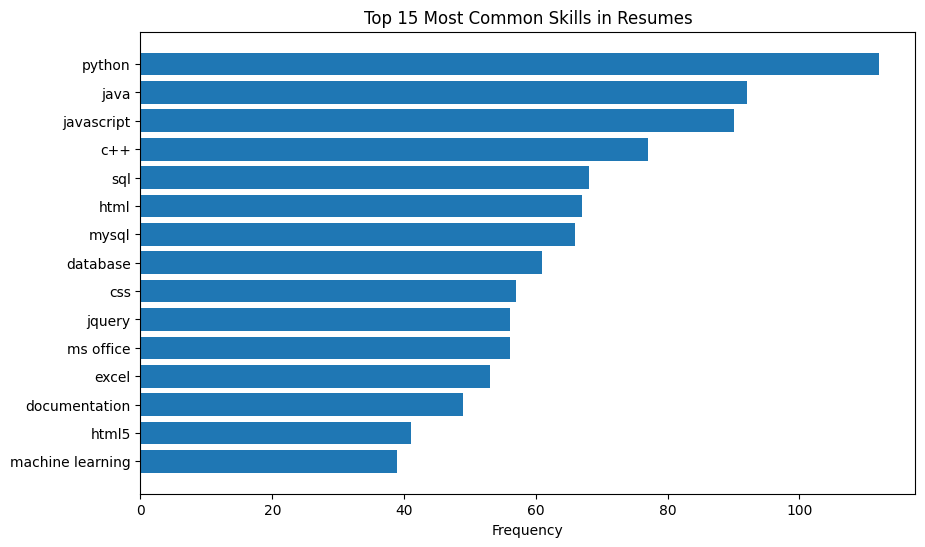

In [53]:
import matplotlib.pyplot as plt
from collections import Counter

# Filter df to include only data related professions
filtered_df = df[df['Category'].isin(['Data Science', 'Hadoop', 'Python Developer', 'Database', 'Business Analyst'])]

# Flatten the list of skill names into a single list
all_skills = [skill for sublist in df['skill_list'] for skill in sublist]

# Count the frequency of each skill
skill_counts = Counter(all_skills)

# Convert the skill counts to a DataFrame for easy visualization
skill_count_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])

# Sort the DataFrame by frequency in descending order
skill_count_df = skill_count_df.sort_values(by='Frequency', ascending=False)

# Get the top 15 most common skills
top_skills = skill_count_df.head(15)

# Plot the top 15 most common skills
plt.figure(figsize=(10, 6))
plt.barh(top_skills['Skill'], top_skills['Frequency'])
plt.xlabel('Frequency')
plt.title('Top 15 Most Common Skills in Resumes')
plt.gca().invert_yaxis()  # To show the highest frequency at the top
plt.show()

### Conclusion: 

The analysis of the top 15 most common skills mentioned in data realated professions (i.e. Data Science, Hadoop, Python Developer, Database, Business Analyst)
- Python and Java are the most common skills, indicating their wide applicability across industries.
- JavaScript and C++ follow closely, highlighting the importance of web development and software engineering.
- SQL and Database skills are frequently mentioned, emphasizing the need for expertise in backend development and data management.
- Machine Learning appears in the top 15, suggesting its growing importance, though it's not as widespread as core programming skills.
- Excel, MS Office, and Documentation reflect the importance of business-oriented skills in technical roles.

### What are the most in-demand skills for each profession?

Identify key skills required for different job roles.


In [54]:
# List of specific categories to filter
categories_of_interest = ["Data Science", "Hadoop", "Python Developer", "Database", "Business Analyst"]

# Filter the main dataframe to include only these categories
filtered_df = df[df["Category"].isin(categories_of_interest)]

# Initialize an empty list to hold the results
top_skills_per_category = []

# Loop over each category in the filtered DataFrame
for category in categories_of_interest:
    category_df = filtered_df[filtered_df["Category"] == category]
    
    # Flatten the list of skills for the current category
    all_skills = [skill for sublist in category_df["skill_list"] for skill in sublist]
    
    # Count the frequency of each skill in this category
    skill_counts = Counter(all_skills)
    
    # Get the top 15 skills
    top_n = 15
    top_skills = skill_counts.most_common(top_n)
    
    # Add the results to the list
    top_skills_per_category.append((category, top_skills))

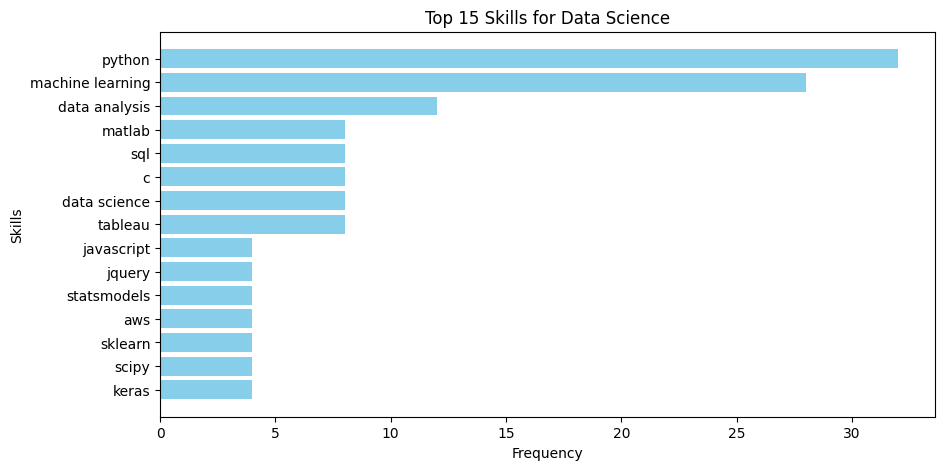

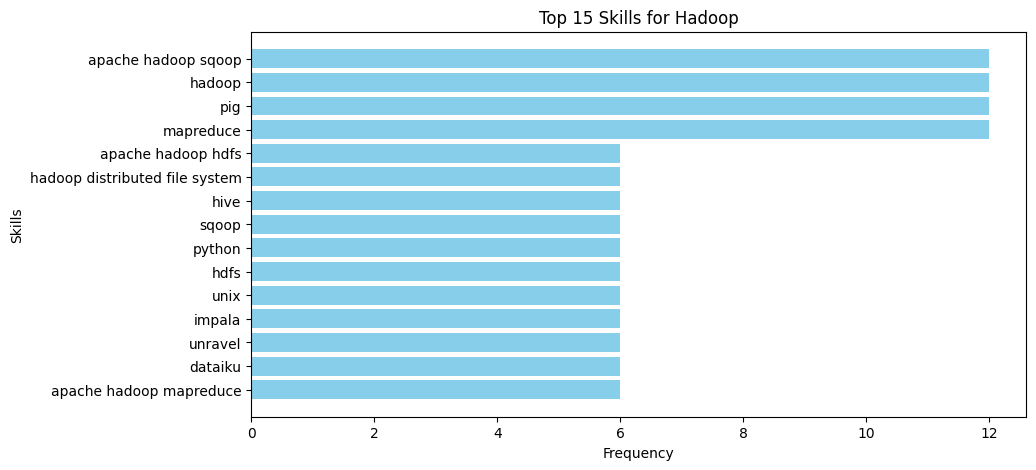

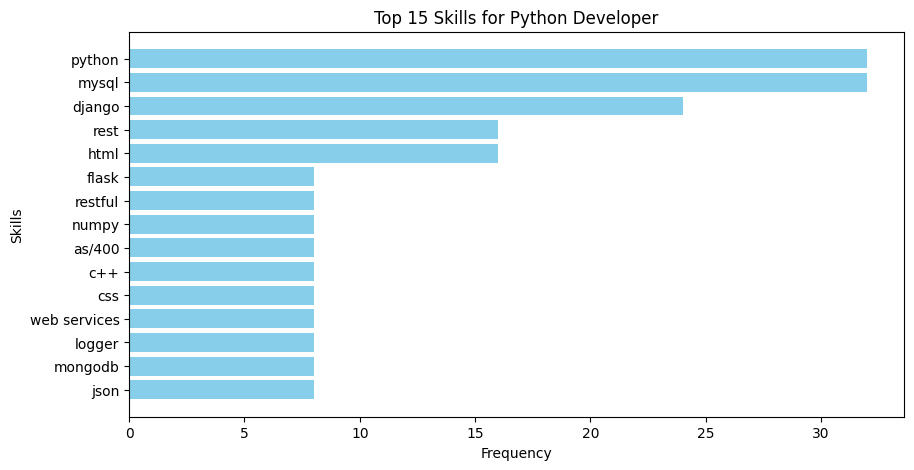

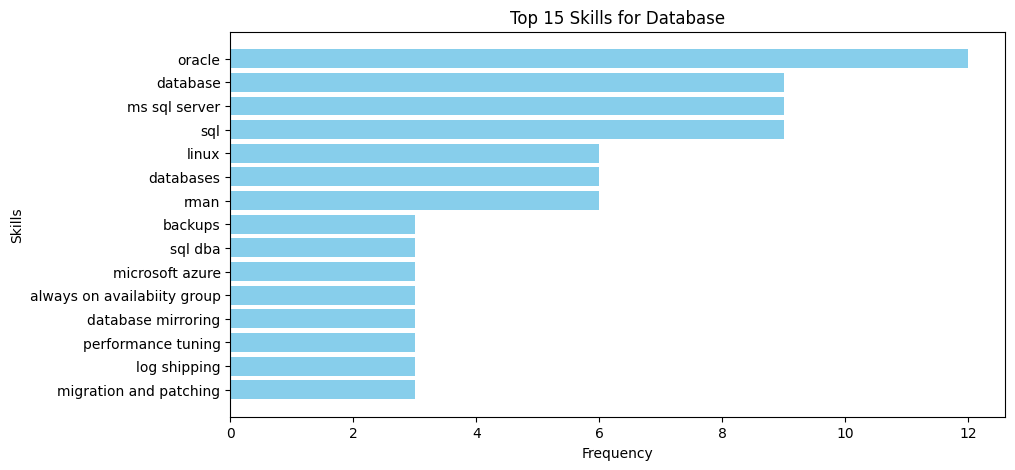

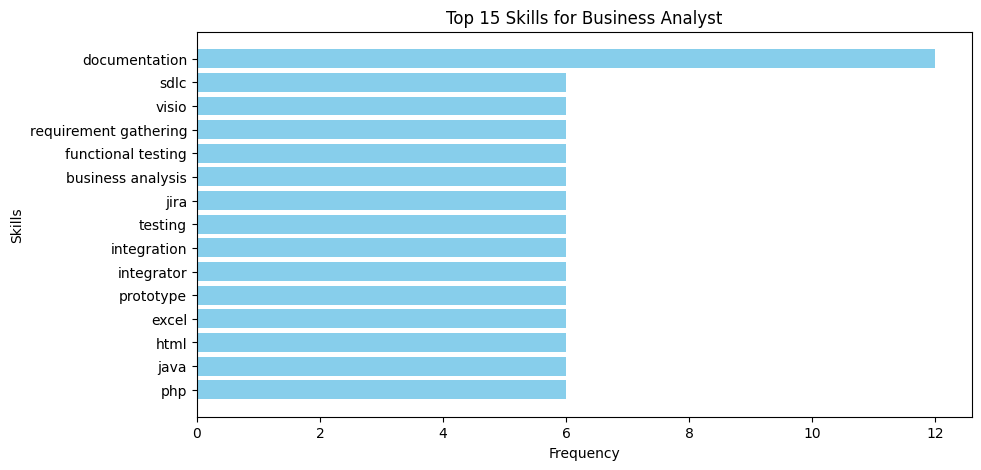

In [55]:
# Plot the top N skills for each category
for category, top_skills in top_skills_per_category:
    skills, counts = zip(*top_skills)
    
    plt.figure(figsize=(10, 5))
    plt.barh(skills, counts, color='skyblue')
    plt.xlabel("Frequency")
    plt.ylabel("Skills")
    plt.title(f"Top {top_n} Skills for {category}")
    plt.gca().invert_yaxis()
    plt.show()

### Conclusion:

For Data Science role, 

- Python and Machine Learning are the most essential skills.
- Data Analysis, C, Data Science, Matlab, SQL, and Tableau are frequently mentioned.
- AWS and Algorithms are key supporting skills.
- JavaScript and JQuery suggest the importance of web technologies.
- Statsmodels, Sklearn, Scipy, and Keras reflect the need for expertise in statistical modeling, machine learning, and deep learning.
- Data Science is also frequently listed, highlighting its core role in the field.

For Hadoop role,

- Apache Hadoop Sqoop, Hadoop, and Pig are the most essential skills.
- MapReduce, Apache Hadoop HDFS, and HDFS are key components for big data processing.
- Hive and Sqoop are important for data querying and transfer.
- Python and Unix are also frequently mentioned.
- Impala, Unravel, Dataiku, and Apache Hadoop MapReduce are additional valuable tools.

For Python Developer role,

- MySQL, Python, and Django are the most essential skills.
- Followed by HTML and REST.
- AS/400, Flask, C++, CSS, and Database are also important skills.
- Numpy, Logger, MongoDB, and JSON suggest the importance of data manipulation, logging, and NoSQL databases in development.

For Database role,

- Oracle, Database, and MS SQL Server are the most essential skills.
- Followed by SQL, Linux, and Databases.
- SQL DBA, Microsoft Azure, and Backups are also frequently mentioned.
- Skills like Performance Tuning, Log Shipping, Database Mirroring, and Always On Availability Group suggest a focus on database management and high availability.
- Migration and Patching reflect the operational tasks involved in maintaining and upgrading database systems.

For Business Analyst role,

- Documentation, Business Analysis, and Excel are the most essential skills.
- Followed by Functional Testing, HTML, and Integration.
- Integrator, Java, Jira, and PHP are also important skills.
- Visio and SDLC are essential for process modeling and understanding the development lifecycle.
- Requirement Gathering is a crucial skill for understanding client needs and project scope.

### How does experience impact the number of skills a candidate has?

Find out if early-career professionals learn more broad skills, while senior professionals specialize.

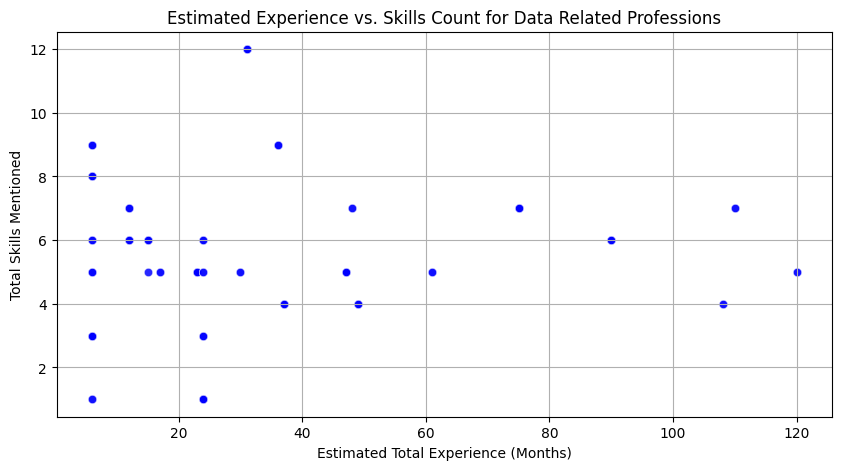

In [56]:
# Filter based on categories of interest
categories_of_interest = ["Data Science", "Hadoop", "Python Developer", "Database", "Business Analyst"]
filtered_df = df[df["Category"].isin(categories_of_interest)].copy()  

# Create a new column for estimated total experience
filtered_df["Estimated_Total_Experience"] = filtered_df["Max_Skill_Experience"]

# Scatter plot: Estimated Total Experience vs. Skills Count for filtered categories
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=filtered_df["Estimated_Total_Experience"], y=filtered_df["Total_Skills_Mentioned"], alpha=0.6, color="blue")
plt.xlabel("Estimated Total Experience (Months)")
plt.ylabel("Total Skills Mentioned")
plt.title("Estimated Experience vs. Skills Count for Data Related Professions")
plt.grid(True)
plt.show()

### Conclusion
- There is no strong correlation between Estimated Total Experience and the number of Total Skills Mentioned in data-related professions.
- Professionals with both low and high experience levels mention a similar number of skills, indicating that experience does not necessarily influence skill count.
- The distribution suggests that skills mentioned are more likely to be influenced by role-specific requirements rather than experience alone.